**Quick Exploratory Data Analysis for RANZCR CLiP - Catheter and Line Position Challenge challenge**

In this competition, you’ll detect the presence and position of catheters and lines on chest x-rays. Use machine learning to train and test your model on 40,000 images to categorize a tube that is poorly placed.

In [1]:
!pip install -q -U pip
!pip install -q -U seaborn

# **Importing Libraries**

In [2]:
import os
import ast
import random

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
import seaborn as sns

In [3]:
BASE_DIR = "../input/ranzcr-clip-catheter-line-classification/"
print(os.listdir(BASE_DIR))

['train_tfrecords', 'sample_submission.csv', 'train_annotations.csv', 'test_tfrecords', 'train.csv', 'test', 'train']


In [4]:
df_train = pd.read_csv(os.path.join(BASE_DIR, "train.csv"), index_col=0)
df_train.head()

,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
StudyInstanceUID,,,,,,,,,,,,
1.2.826.0.1.3680043.8.498.26697628953273228189375557799582420561,0,0,0,0,0,0,1,0,0,0,0,ec89415d1
1.2.826.0.1.3680043.8.498.46302891597398758759818628675365157729,0,0,1,0,0,1,0,0,0,1,0,bf4c6da3c
1.2.826.0.1.3680043.8.498.23819260719748494858948050424870692577,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5
1.2.826.0.1.3680043.8.498.68286643202323212801283518367144358744,0,0,0,0,0,0,0,1,0,0,0,c31019814
1.2.826.0.1.3680043.8.498.10050203009225938259119000528814762175,0,0,0,0,0,0,0,0,0,1,0,207685cd1


**StudyInstanceUID** - unique ID for each image <br>
**ETT** - Abnormal - endotracheal tube placement abnormal<br>
**ETT** - Borderline - endotracheal tube placement borderline abnormal<br>
**ETT** - Normal - endotracheal tube placement normal<br>
**NGT** - Abnormal - nasogastric tube placement abnormal<br>
**NGT** - Borderline - nasogastric tube placement borderline abnormal<br>
**NGT** - Incompletely Imaged - nasogastric tube placement inconclusive due to imaging<br>
**NGT** - Normal - nasogastric tube placement borderline normal<br>
**CVC** - Abnormal - central venous catheter placement abnormal<br>
**CVC** - Borderline - central venous catheter placement borderline abnormal<br>
**CVC** - Normal - central venous catheter placement normal<br>
Swan Ganz Catheter Present<br>
**PatientID** - unique ID for each patient in the dataset

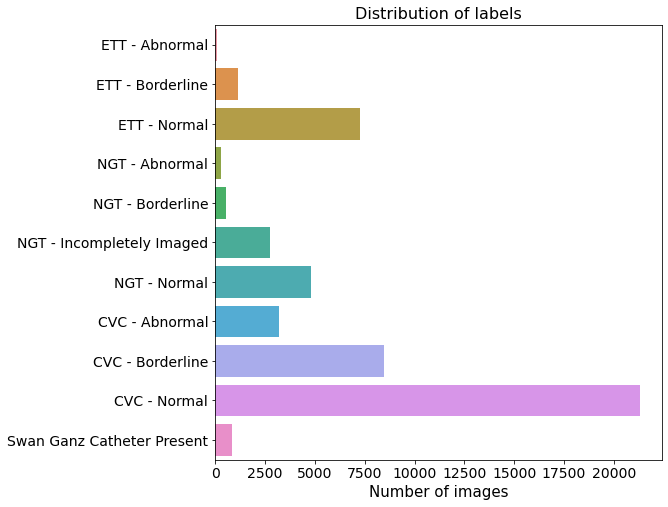

In [5]:
plt.figure(figsize=(8, 8))
df_tmp = df_train.iloc[:, :-1].sum()
sns.barplot(x=df_tmp.values, y=df_tmp.index)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Number of images", fontsize=15)
plt.title("Distribution of labels", fontsize=16);

In [6]:
print("Number of unique patients: ", df_train["PatientID"].unique().shape[0])

Number of unique patients:  3255


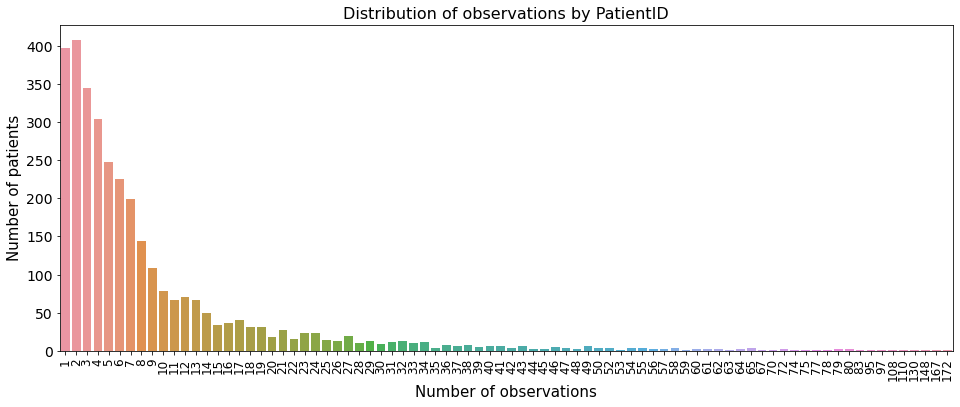

In [7]:
plt.figure(figsize=(16, 6))
df_tmp = df_train["PatientID"].value_counts()
sns.countplot(x=df_tmp.values)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=14)
plt.xlabel("Number of observations", fontsize=15)
plt.ylabel("Number of patients", fontsize=15)
plt.title("Distribution of observations by PatientID", fontsize=16);

# **Annotations**

In [8]:
df_annot = pd.read_csv(os.path.join(BASE_DIR, "train_annotations.csv"))
df_annot.head()

,StudyInstanceUID,label,data
0,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1487, 1279], [1477, 1168], [1472, 1052], [14..."
1,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1328, 7], [1347, 101], [1383, 193], [1400, 2..."
2,1.2.826.0.1.3680043.8.498.72921907356394389969...,CVC - Borderline,"[[801, 1207], [812, 1112], [823, 1023], [842, ..."
3,1.2.826.0.1.3680043.8.498.11697104485452001927...,CVC - Normal,"[[1366, 961], [1411, 861], [1453, 751], [1508,..."
4,1.2.826.0.1.3680043.8.498.87704688663091069148...,NGT - Normal,"[[1862, 14], [1845, 293], [1801, 869], [1716, ..."


In [9]:
def plot_image_with_annotations(row_ind):
    row = df_annot.iloc[row_ind]
    image_path = os.path.join(BASE_DIR, "train", row["StudyInstanceUID"] + ".jpg")
    label = row["label"]
    data = np.array(ast.literal_eval(row["data"]))
    
    plt.figure(figsize=(10, 5))
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    plt.imshow(image)
    plt.scatter(data[:, 0], data[:, 1])
    
    plt.suptitle(label, fontsize=15)

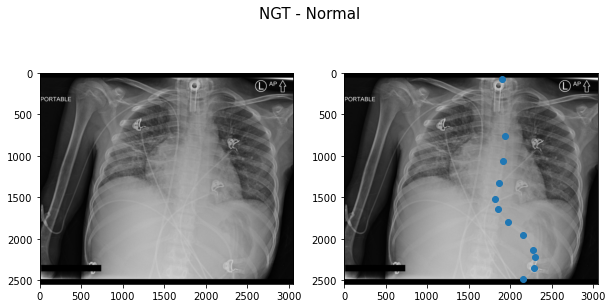

In [10]:
plot_image_with_annotations(8)

In [11]:

def visualize_annotations(file_id):
    plt.figure(figsize=(8, 8))
    
    image = cv2.imread(os.path.join(BASE_DIR, "train", file_id + ".jpg"))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    
    df_patient = df_annot.loc[df_annot["StudyInstanceUID"] == file_id]
    
    if df_patient.shape[0]:        
        labels = df_patient["label"].values.tolist()
        lines = df_patient["data"].apply(ast.literal_eval).values.tolist()

        for line, label in zip(lines, labels):         
            line = np.asarray(line)
            plt.scatter(line[:, 0], line[:, 1], s=40, label=label)
        
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, prop={'size': 20})
        
    plt.tick_params(axis="x", labelsize=15)
    plt.tick_params(axis="y", labelsize=15)
    
    plt.show()

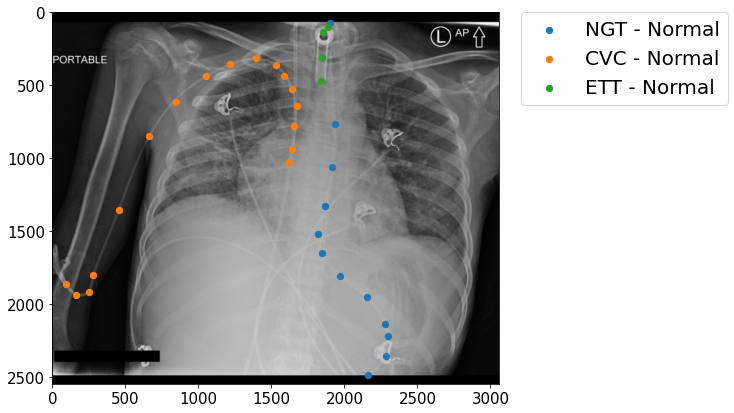

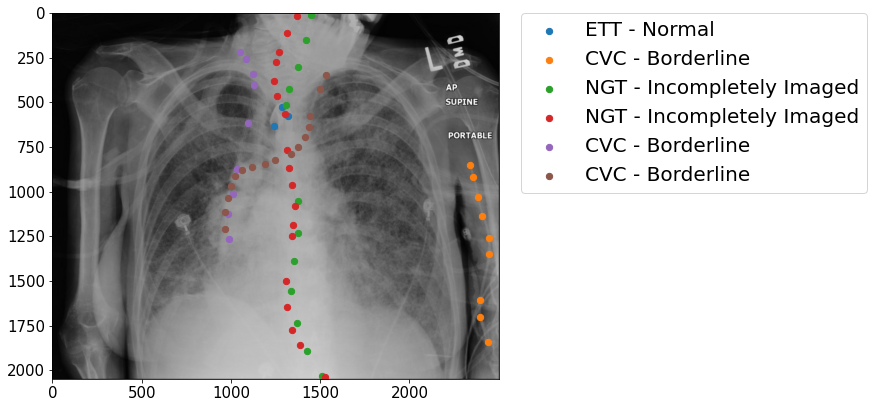

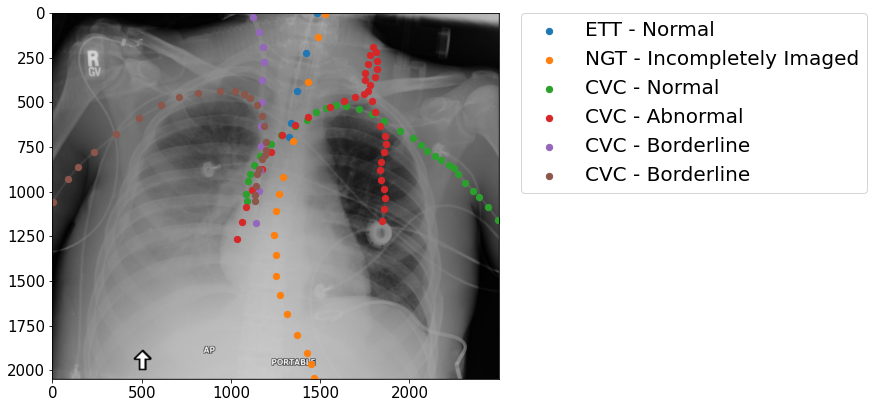

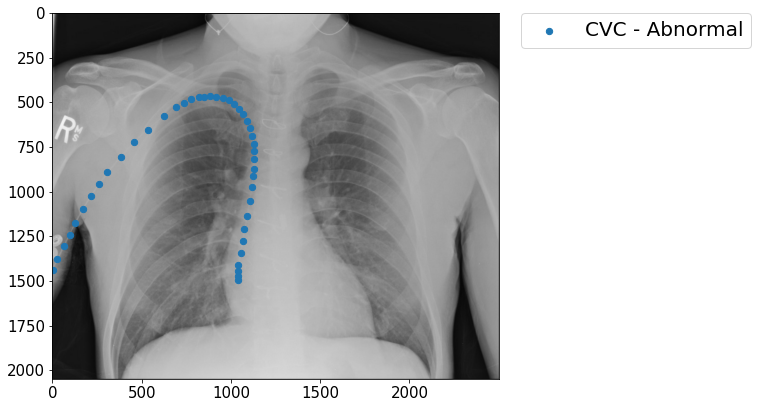

In [12]:
image_ids = [
    "1.2.826.0.1.3680043.8.498.83331936392921199432218327504041001669",
    "1.2.826.0.1.3680043.8.498.11693509889426445054876979814173446281",
    "1.2.826.0.1.3680043.8.498.15159015355212130418020059688126994534",
    "1.2.826.0.1.3680043.8.498.92067938763801985117661596637576203997",
]

for image_id in image_ids:
    visualize_annotations(image_id)

# **ETT Abnormal**

In [13]:
def visualize_batch(image_ids):
    plt.figure(figsize=(16, 10))
    
    for ind, image_id in enumerate(image_ids):
        plt.subplot(2, 3, ind + 1)
        image = cv2.imread(os.path.join(BASE_DIR, "train", f"{image_id}.jpg"))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.imshow(image)
        plt.axis("off")
    
    plt.show()

    
def plot_statistics(df, col):
    plt.figure(figsize=(16, 2))
    sns.countplot(y=df[col])
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel("Number of observations", fontsize=15)
    plt.ylabel(col, fontsize=15)
    plt.title(f"Distribution of {col}", fontsize=16);
    
    plt.show()
    
def process_class(col_name):
    plot_statistics(df_train, col_name)
    tmp_df = df_train[df_train[col_name] == 1]
    visualize_batch(random.sample(tmp_df.index.tolist(), 6))

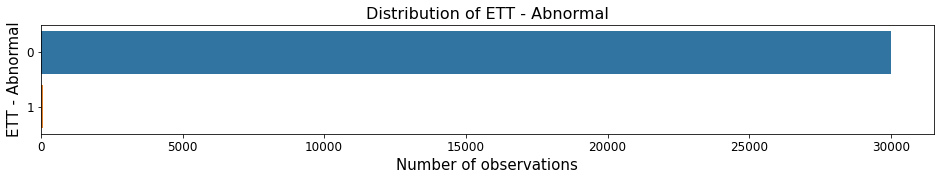

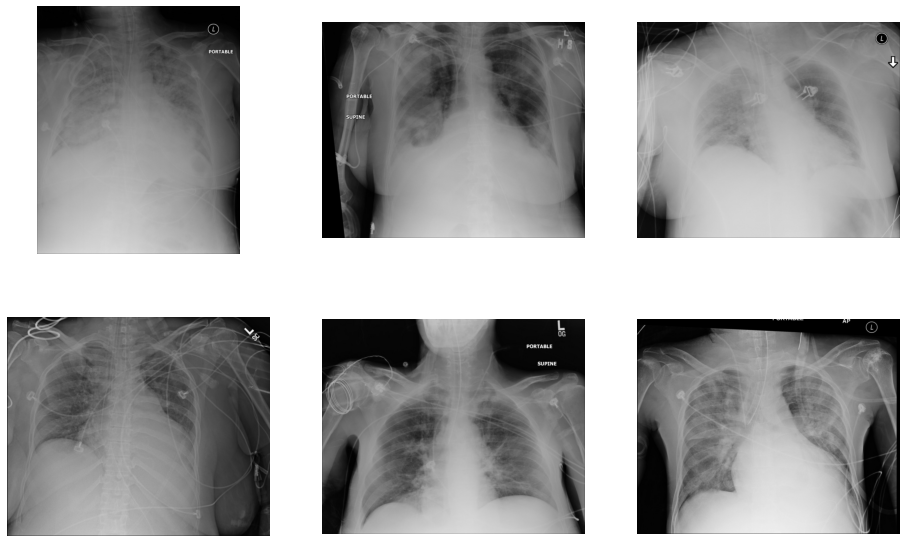

In [14]:
process_class("ETT - Abnormal")

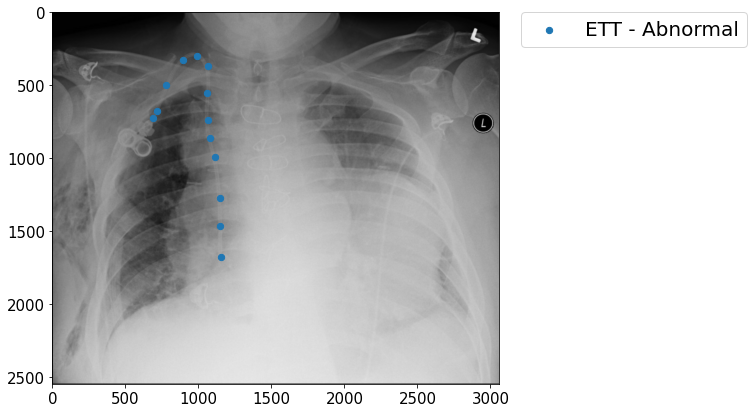

In [15]:
visualize_annotations("1.2.826.0.1.3680043.8.498.93345761486297843389996628528592497280")

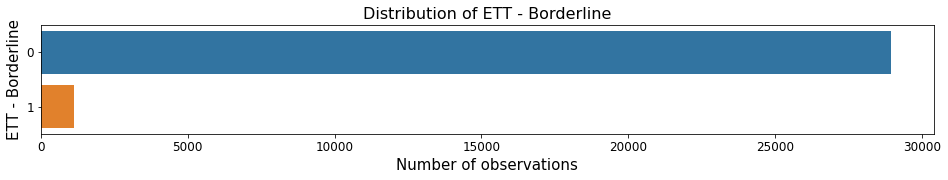

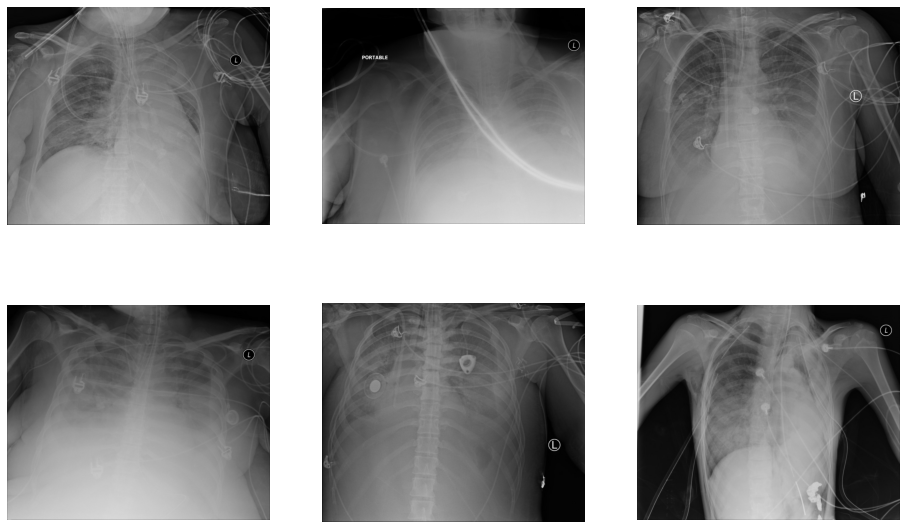

In [16]:
process_class("ETT - Borderline")

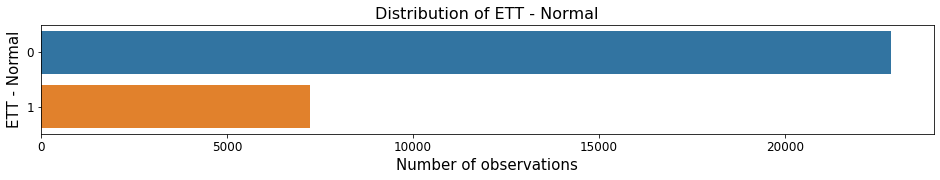

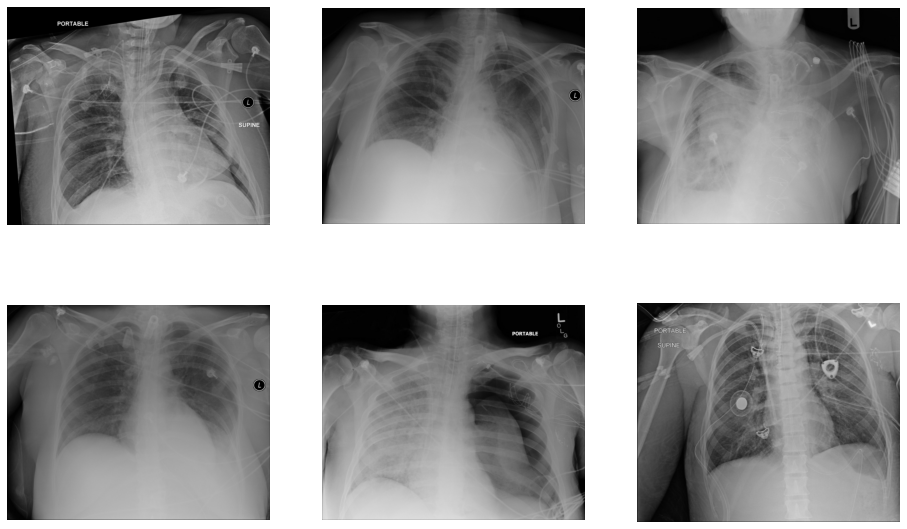

In [17]:
process_class("ETT - Normal")

# **Abnormal**

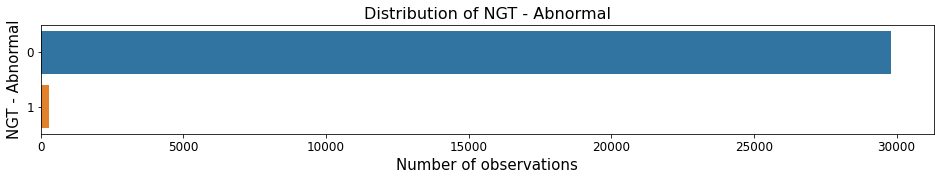

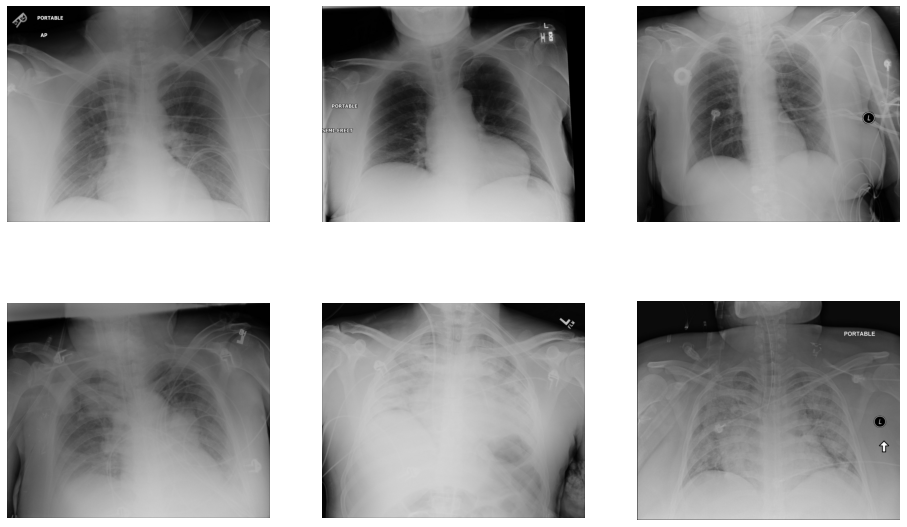

In [18]:
process_class("NGT - Abnormal")

# **Borderline**

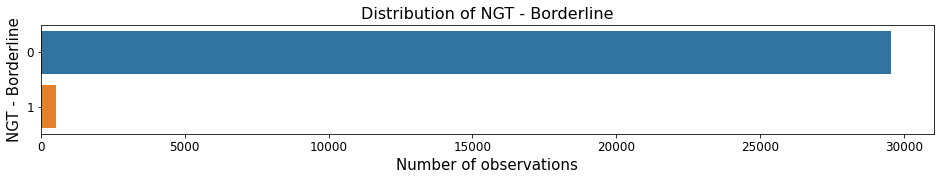

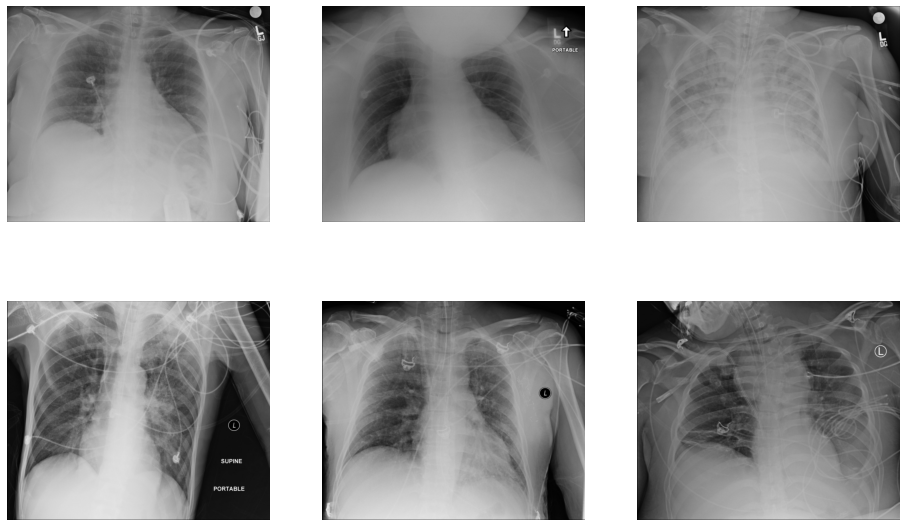

In [19]:
process_class("NGT - Borderline")

# **Incomplete Images**

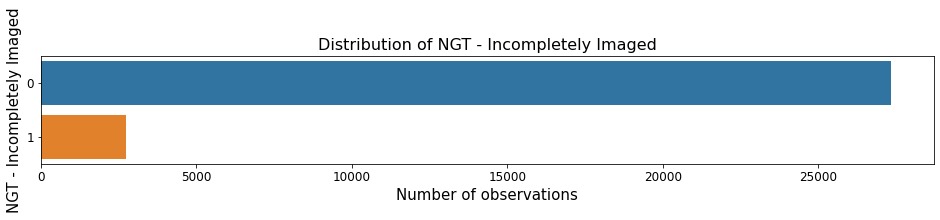

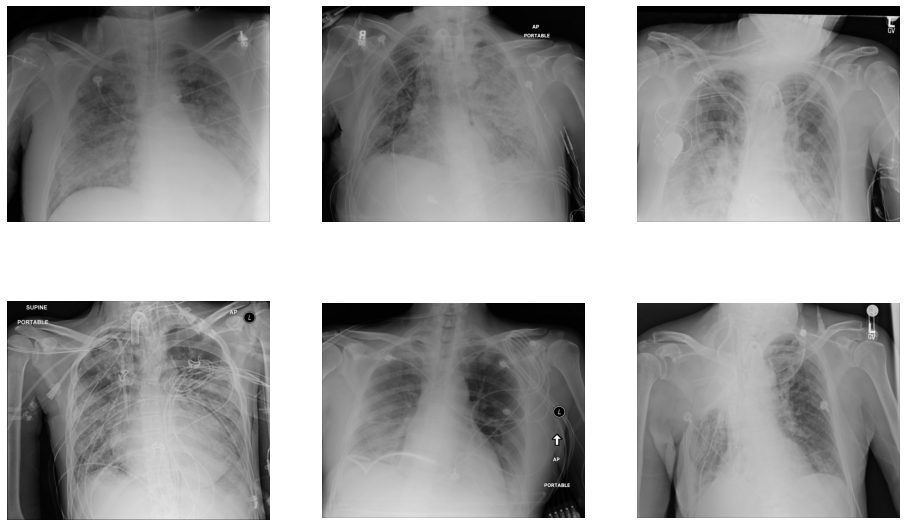

In [20]:
process_class("NGT - Incompletely Imaged")

# **Venn Diagrams**

In [21]:
def plot_venn2(col_1, col_2):
    plt.figure(figsize=(6, 6))
    
    area_10 = df_train[col_1].sum()
    area_01 = df_train[col_2].sum()
    area_11 = df_train[(df_train[col_1] == 1) & (df_train[col_2] == 1)].shape[0]

    venn2(
        subsets=(area_10, area_01, area_11), 
        set_labels=(col_1, col_2),
        alpha=0.5,
    )

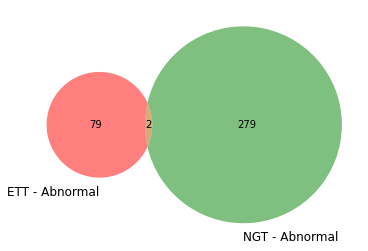

In [22]:
plot_venn2("ETT - Abnormal", "NGT - Abnormal")

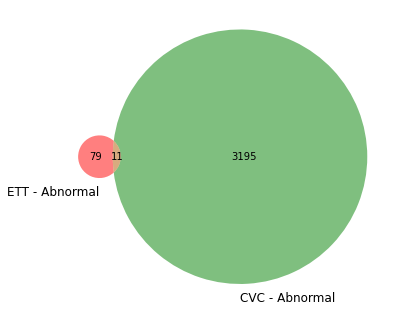

In [23]:
plot_venn2("ETT - Abnormal", "CVC - Abnormal")

In [24]:
def plot_venn3(col_1, col_2, col_3):
    plt.figure(figsize=(6, 6))
    
    area_100 = df_train[col_1].sum()
    area_010 = df_train[col_2].sum()
    area_110 = df_train[(df_train[col_1] == 1) & (df_train[col_2] == 1)].shape[0]
    area_001 = df_train[col_3].sum()
    area_101 = df_train[(df_train[col_1] == 1) & (df_train[col_3] == 1)].shape[0]
    area_011 = df_train[(df_train[col_2] == 1) & (df_train[col_3] == 1)].shape[0]
    area_111 = df_train[(df_train[col_1] == 1) & (df_train[col_2] == 1) & (df_train[col_3] == 1)].shape[0]

#     print(area_100, area_010, area_110, area_001, area_101, area_011, area_111)

    venn3(
        subsets=(area_100, area_010, area_110, area_001, area_101, area_011, area_111), 
        set_labels=(col_1, col_2, col_3), 
        alpha=0.5
    );

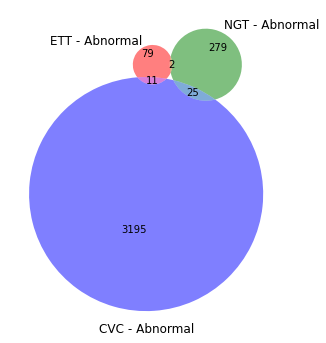

In [25]:
plot_venn3(
    "ETT - Abnormal",
    "NGT - Abnormal",
    "CVC - Abnormal",
)

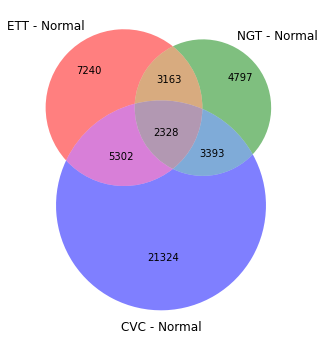

In [26]:
plot_venn3(
    "ETT - Normal",
    "NGT - Normal",
    "CVC - Normal",
)

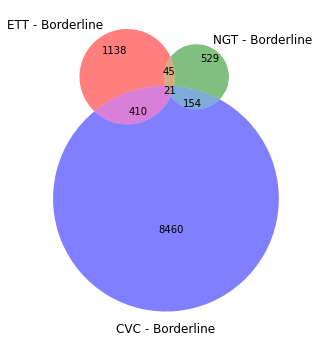

In [27]:
plot_venn3(
    "ETT - Borderline",
    "NGT - Borderline",
    "CVC - Borderline",
)

In [28]:
df_submission = pd.read_csv(os.path.join(BASE_DIR, "sample_submission.csv"), index_col=0)
df_submission

,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present
StudyInstanceUID,,,,,,,,,,,
1.2.826.0.1.3680043.8.498.46923145579096002617106567297135160932,0,0,0,0,0,0,0,0,0,0,0
1.2.826.0.1.3680043.8.498.84006870182611080091824109767561564887,0,0,0,0,0,0,0,0,0,0,0
1.2.826.0.1.3680043.8.498.12219033294413119947515494720687541672,0,0,0,0,0,0,0,0,0,0,0
1.2.826.0.1.3680043.8.498.84994474380235968109906845540706092671,0,0,0,0,0,0,0,0,0,0,0
1.2.826.0.1.3680043.8.498.35798987793805669662572108881745201372,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1.2.826.0.1.3680043.8.498.81464483108873296584005201807676213920,0,0,0,0,0,0,0,0,0,0,0
1.2.826.0.1.3680043.8.498.33579133018211530710953337175568300314,0,0,0,0,0,0,0,0,0,0,0
1.2.826.0.1.3680043.8.498.61472811086105902907935935811857560107,0,0,0,0,0,0,0,0,0,0,0


In [29]:
df_submission.to_csv("submission.csv")